In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("GenZ_DatingApp_Data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

Task 1: Data Quality Assessment 

Q1: Are there any duplicate rows? If yes, why might duplicates exist in this dataset?

In [13]:
#To check for any duplicated rows
# Returns True for duplicate rows
duplicates = data[data.duplicated()]

# Display duplicate rows
print(duplicates)

#To display the sum of duplicate rows
duplicate_count = data.duplicated().sum()
print(duplicate_count)

Empty DataFrame
Columns: [User_ID, Age, Gender, Location, Education, Occupation, Primary_App, Secondary_Apps, Usage_Frequency, Daily_Usage_Time, Reason_for_Using, Satisfaction, Challenges, Desired_Features, Preferred_Communication, Partner_Priorities]
Index: []
0


The code indicates that there are no duplicate rows, as shown by the empty DataFrame and a count of zero (0)

In [8]:
num_rows = len(data)
print(f'Number of rows: {num_rows}')

Number of rows: 500


In [9]:
num_columns = len(data.columns)
print(f'Number of columns: {num_columns}')

Number of columns: 16


In [10]:
data.head()

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


Q2: Are there inconsistencies in categorical values (e.g., spelling variations, case
sensitivity)?

In [14]:
#First of all we identify the categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Gender', 'Location', 'Education', 'Occupation', 'Primary_App',
       'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


In [16]:
# Display unique values in each categorical column to find inconsistencies
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())



Unique values in 'Gender':
['Non-binary' 'Female' 'Male']

Unique values in 'Location':
['Bangalore' 'Delhi' 'Kolkata' 'Mumbai' 'Chennai' 'Pune' 'Hyderabad']

Unique values in 'Education':
['Undergraduate' 'Graduate' 'Postgraduate']

Unique values in 'Occupation':
['Freelancer' 'Part-time Job' 'Intern' 'Full-time Job' 'Student']

Unique values in 'Primary_App':
['Hinge' nan 'OkCupid' 'Tinder' 'Bumble']

Unique values in 'Secondary_Apps':
['Hinge' 'OkCupid' nan 'Tinder' 'Bumble']

Unique values in 'Usage_Frequency':
['Monthly' 'Weekly' 'Daily']

Unique values in 'Daily_Usage_Time':
['1 hour' '30 minutes' '2 hours' '1.5 hours' '3 hours']

Unique values in 'Reason_for_Using':
['Finding a Partner' 'Casual Dating' 'Casual Fun' 'Social Interaction']

Unique values in 'Challenges':
['Safety Concerns' 'Time-Wasting' nan 'Lack of Genuine Matches']

Unique values in 'Desired_Features':
['Audio Calls' 'Video Calls' 'Detailed Profiles' 'AI Recommendations'
 'Location-Based Matching']

Unique valu

In [19]:
# Check for case sensitivity issues in categorical columns
for col in categorical_cols:
    unique_values = data[col].dropna().unique()
    lower_case_values = [str(val).lower() for val in unique_values]
    
    if len(set(lower_case_values)) != len(set(unique_values)):
        print(f"Case sensitivity issue found in column: {col}")
    else:
        print(f"No case sensitivity issues in column: {col}")


No case sensitivity issues in column: Gender
No case sensitivity issues in column: Location
No case sensitivity issues in column: Education
No case sensitivity issues in column: Occupation
No case sensitivity issues in column: Primary_App
No case sensitivity issues in column: Secondary_Apps
No case sensitivity issues in column: Usage_Frequency
No case sensitivity issues in column: Daily_Usage_Time
No case sensitivity issues in column: Reason_for_Using
No case sensitivity issues in column: Challenges
No case sensitivity issues in column: Desired_Features
No case sensitivity issues in column: Preferred_Communication
No case sensitivity issues in column: Partner_Priorities


In [20]:
# Check for extra spaces in categorical columns
for col in categorical_cols:
    if data[col].str.contains(r'^\s|\s$', regex=True).any():
        print(f"Extra spaces found in column: {col}")
    else:
        print(f"No extra spaces in column: {col}")


No extra spaces in column: Gender
No extra spaces in column: Location
No extra spaces in column: Education
No extra spaces in column: Occupation
No extra spaces in column: Primary_App
No extra spaces in column: Secondary_Apps
No extra spaces in column: Usage_Frequency
No extra spaces in column: Daily_Usage_Time
No extra spaces in column: Reason_for_Using
No extra spaces in column: Challenges
No extra spaces in column: Desired_Features
No extra spaces in column: Preferred_Communication
No extra spaces in column: Partner_Priorities


Answer: No inconsistencies were found in the dataset's categorical columns after the check.

Q3: What should we do if a column has too many missing values?

everal actions can be taken to address missing values in a dataset. Based on research, here are a few steps to handle missing data:

Step 1: Remove the Column (Drop it)
This approach is suitable when a column has over 50% missing values and is not essential to the analysis. It is also used when the missing data cannot be easily filled or does not contribute much value.
The code to drop a column with more than 50% missing values is:

python
Copy
Edit
data = data.dropna(thresh=len(data) * 0.5, axis=1)
Step 2: Fill in the Missing Values (Imputation)
If the column is important, the missing values can be replaced with meaningful data.

Step 3: For Categorical Columns (Text Data):

Fill with the most common value (mode)
For Numerical Columns (Numbers):

Fill with the average (mean) or middle value (median)
Step 4: Flag the Missing Values
Mark the missing values for further analysis.

Step 5: Remove Rows with Missing Values
In some cases, you may choose to remove entire rows that contain missing values.

Q4: Are there outliers in numerical columns? If so, should we remove or adjust them?

There were no outliers found in the numerical columns "Age" and "Satisfaction." The data appears clean for these columns.

Activity 1: Identify missing values & decide whether to drop, fill, or flag them.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

In [22]:
data.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64

In [27]:
data["Primary_App"] = data["Primary_App"].fillna(data["Secondary_Apps"])

In [28]:
data.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                  0
Secondary_Apps               0
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64

In [30]:
data["Challenges"] = data["Challenges"].fillna("Unknown")

In [31]:
data.isnull().sum()

User_ID                    0
Age                        0
Gender                     0
Location                   0
Education                  0
Occupation                 0
Primary_App                0
Secondary_Apps             0
Usage_Frequency            0
Daily_Usage_Time           0
Reason_for_Using           0
Satisfaction               0
Challenges                 0
Desired_Features           0
Preferred_Communication    0
Partner_Priorities         0
dtype: int64

After completing Activity 1 there are no missing values. Initially Columns "Primary_App" and "Secondary_Apps" had a total of "107" and "114" missing values respectively but the missing values were replaced. Also the "Challenges" columns had a total of "117" missing values which i later replaced them with unknown.

Activity 2: Check for duplicates and remove them if necessary.

In [34]:
#To display the sum of duplicate
duplicate_count = data.duplicated().sum()
print(f"The total number of duplicates is {duplicate_count}")

The total number of duplicates is 0


Activity 3: Standardize categorical values (e.g., ensuring "Male" and "male" are the same).

In [37]:
categorical_columns = ["Gender", "Location", "Education", "Occupation", "Primary_App", 
                    "Secondary_Apps", "Usage_Frequency", "Reason_for_Using", 
                    "Challenges", "Desired_Features", "Preferred_Communication"]
for col in categorical_columns:
    data[col] = data[col].astype(str).str.lower().str.strip()

In [39]:
data.head(5)

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,non-binary,bangalore,undergraduate,freelancer,hinge,hinge,monthly,1 hour,finding a partner,4,safety concerns,audio calls,video calls,Values > Personality > Appearance
1,2,24,female,delhi,undergraduate,part-time job,hinge,okcupid,weekly,30 minutes,casual dating,5,time-wasting,video calls,text,Values > Personality > Appearance
2,3,24,non-binary,kolkata,undergraduate,intern,none,none,weekly,2 hours,casual dating,4,safety concerns,detailed profiles,text,Values > Personality > Appearance
3,4,22,non-binary,delhi,graduate,full-time job,none,okcupid,daily,30 minutes,casual fun,3,unknown,ai recommendations,voice notes,Personality > Interests > Values
4,5,18,male,delhi,graduate,intern,okcupid,okcupid,weekly,2 hours,casual fun,4,safety concerns,video calls,text,Appearance > Interests > Personality


In [42]:
#To convert all object data types into categorical data types
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    int64   
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

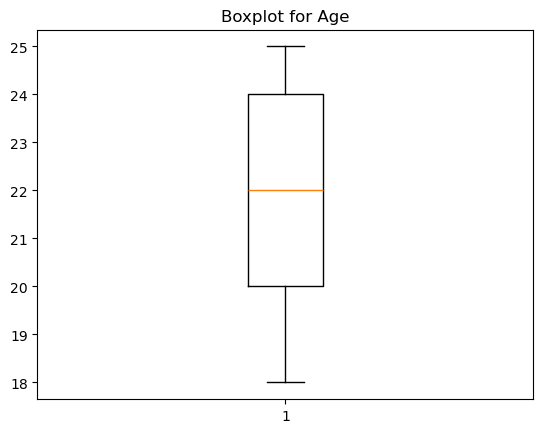

In [47]:
# Plot a boxplot to identify the outliers
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()

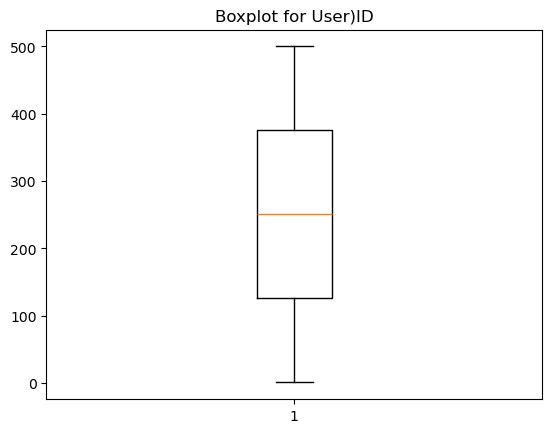

In [48]:
# Plot a boxplot to identify the outliers
plt.boxplot(data['User_ID'])
plt.title('Boxplot for User)ID')
plt.show()

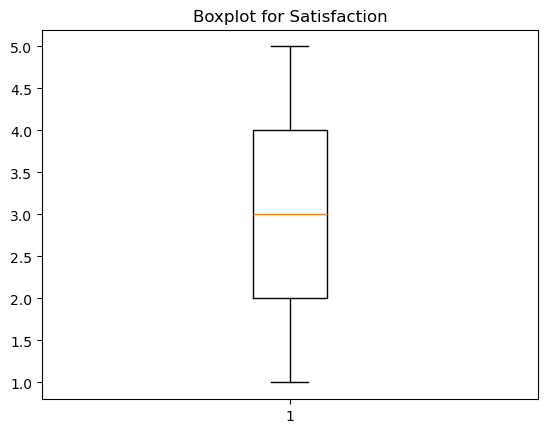

In [49]:
# Plot a boxplot to identify the outliers
plt.boxplot(data['Satisfaction'])
plt.title('Boxplot for Satisfaction')
plt.show()

In [50]:
data.to_csv('Cleaned_GenZ_DatingApp_Data.csv', index=False)